In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import copy
from functions.Environment import Environment
from functions.Particles import Particles
from functions.Simulators import Simulators
from functions.DataProcesser import DataProcesser as dp

In [2]:
# set the initial values
env = Environment(room_size=[0,100,0,100], heat_hole_width=50, heat_hole_buffer=0.01)
# Call the class and set the particles
p = Particles(100)
p.set_particles(room_size=env.room_size)

C:\Users\gillw\AppData\Local\Temp\ipykernel_1832\2334086536.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  suck_zone = np.array([env.suck_zone_radius, env.ac_suck_hole_dot, (-np.pi/2, np.pi/2)])


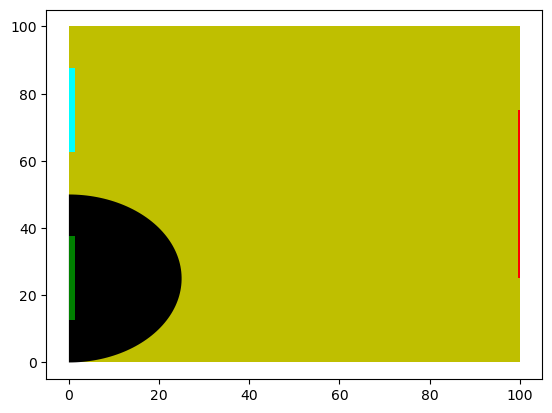

In [3]:
suck_zone = np.array([env.suck_zone_radius, env.ac_suck_hole_dot, (-np.pi/2, np.pi/2)])
zones = [env.room_size, env.ac_blow_hole, suck_zone, env.ac_suck_hole, env.heat_hole]
color = ['y', 'cyan', 'k', 'g', 'r']
dp.plot_multi_zones(zones, color)

In [4]:
# # Test function: This code can work, comment out for now (square zone)
# # 假設你的陣列是這樣：
# box = np.array([0, 1, 0, 1])

# # 創建一個新的圖像
# plt.figure()

# # 繪製正方形
# x = [box[0], box[1], box[1], box[0]]
# y = [box[2], box[2], box[3], box[3]]
# plt.fill(x, y, 'b')  # 'b' 是藍色，你可以選擇你喜歡的顏色
# for i in range(len(x)):
#     plt.plot(x[i], y[i], 'o')
#     plt.text(x[i], y[i], f'({x[i]}, {y[i]})')

# # 顯示圖像
# plt.show()

In [5]:
# # Test function: This code can work, comment out for now (add circle zone)
# # 假設你的陣列是這樣：
# box1 = np.array([0, 2, 0, 2])
# box2 = np.array([0.5, 1.5, 0.5, 1.5])
# box3 = np.array([np.array([0,1]),1,(-np.pi/2, np.pi/2)])
# box_all = [box1, box2, box3]
# color = ['b', 'r', 'g']
# # 創建一個新的圖像
# plt.figure()

# # 繪製正方形
# for n,box in enumerate(box_all):
#     if len(box) == 4:
#         x = [box[0], box[1], box[1], box[0]]
#         y = [box[2], box[2], box[3], box[3]]
#         plt.fill(x, y, color[n])  
#         for i in range(len(x)):
#             plt.plot(x[i], y[i], 'o')
#             plt.text(x[i], y[i], f'({x[i]}, {y[i]})')
#     elif len(box) == 3:
#         theta = np.linspace(box[2][0], box[2][1], 100)
#         x = box[0][0] + box[1] * np.cos(theta)
#         y = box[0][1] + box[1] * np.sin(theta)
#         plt.fill(x, y, color[n])

# # 顯示圖像
# plt.show()

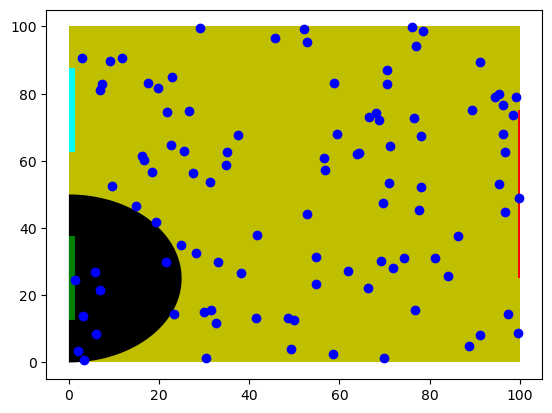

[False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [6]:
# Check if is_the_particle_in_the_zone works (OK)

# 呼叫 plot_multi_zones 函數
dp.plot_multi_zones(zones, color, zone_only=False)

# 呼叫 plot_points_on_zones 函數
dp.plot_points_on_zones(p.pos, color='blue')

mask = Environment.is_the_particle_in_the_zone(pos=p.pos, zone=env.heat_hole)
# 顯示圖形
plt.show()
print(mask)

In [7]:
vel_0 = copy.deepcopy(p.vel)
env.heat_hole_add_temperature(particles=p)
vel0 = np.sum(np.square(vel_0),axis=1)
vel1 = np.sum(np.square(p.vel),axis=1)
L = []
for i in range(len(vel0)):
    L +=[tuple([ mask[i], vel0[i], vel1[i]])]

with open('vel_compare.txt', 'w') as f:
    for item in L:
        f.write("%s\n" % str(item))


In [8]:
vel0_unit = vel_0 / np.sqrt(vel_0[:,0]**2 + vel_0[:,1]**2).reshape(-1,1)
vel1_unit = p.vel / np.sqrt(p.vel[:,0]**2 + p.vel[:,1]**2).reshape(-1,1)
L = []
for i in range(len(vel0)):
    L +=[tuple([ mask[i], (vel0_unit[i]-vel1_unit[i])])]

with open('vel_direction_compare.txt', 'w') as f:
    for item in L:
        f.write("%s\n" % str(item))

In [9]:
L1 = np.array([1,2])
L2 = np.array([[5,6],[7,8]])
print(np.sqrt(L2[:,0]**2 + L2[:,1]**2))

[ 7.81024968 10.63014581]


In [10]:
cosine = L2[:,0]/np.sqrt(L2[:,0]**2 + L2[:,1]**2)
sine   = L2[:,1]/np.sqrt(L2[:,0]**2 + L2[:,1]**2)
unit1  = np.array([cosine, sine]).T
unit2  = L2 / np.sqrt(L2[:,0]**2 + L2[:,1]**2).reshape(-1,1)
print(f'unit1 = {unit1},\n unit2 = {unit2}')

unit1 = [[0.6401844  0.76822128]
 [0.65850461 0.75257669]],
 unit2 = [[0.6401844  0.76822128]
 [0.65850461 0.75257669]]


In [11]:
print(5/7.81024968)

0.6401843993289598


In [ ]:
# To Find
# size of heat zone
# collision or not
# number of particles